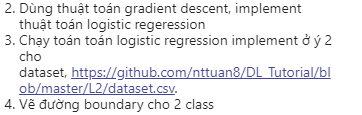

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")
df

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [3]:
X_train = df[["Lương", "Thời gian làm việc"]].values
Y_train = df["Cho vay"].values

In [4]:
X_train

array([[10.  ,  1.  ],
       [ 5.  ,  2.  ],
       [ 6.  ,  1.8 ],
       [ 7.  ,  1.  ],
       [ 8.  ,  2.  ],
       [ 9.  ,  0.5 ],
       [ 4.  ,  3.  ],
       [ 5.  ,  2.5 ],
       [ 8.  ,  1.  ],
       [ 4.  ,  2.5 ],
       [ 8.  ,  0.1 ],
       [ 7.  ,  0.15],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.8 ],
       [ 7.  ,  0.3 ],
       [ 4.  ,  1.  ],
       [ 5.  ,  0.5 ],
       [ 6.  ,  0.3 ],
       [ 7.  ,  0.2 ],
       [ 8.  ,  0.15]])

In [5]:
Y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [6]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    def fit(self, X, Y):        
        #no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        
        # weight initialization        
        self.W = np.zeros(self.n)        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
        for i in range(self.iterations):            
            self.update_weights()   
            
        return self
            
    def update_weights(self):           
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))
          
        # calculate gradients        
        temp = (A - self.Y.T)        
        temp = np.reshape(temp, self.m)        
        dW = np.dot(self.X.T, temp) / self.m         
        db = np.sum(temp) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
            
    def predict(self, X):    
        Z = 1 / (1 + np.exp(- (X.dot(self.W) + self.b)))        
        Y = np.where(Z > 0.5, 1, 0)        
        return Y
    
    def theta(self):
        return self.W
    
    def intercept(self):
        return self.b

    def visualize(self):
        pass

In [7]:
test = LogisticRegression(0.001, 200000)

In [8]:
test.fit(X_train, Y_train)

In [9]:
print(test.theta())
print(test.intercept())

[0.62880911 3.64094357]
-7.248360442294369


Text(0.5, 0, '$x_1$')

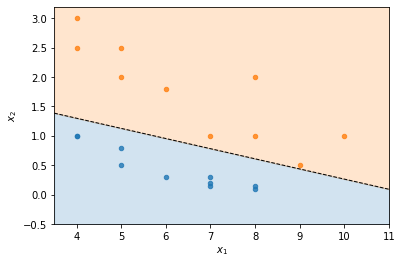

In [29]:
b = test.intercept()
w1, w2 = test.theta().T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

# Plot the data and the classification with the decision boundary.
xmin, xmax = 3.5, 11
ymin, ymax = -0.5, 3.2
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*X_train[Y_train==0].T, s=20, alpha=0.8)
plt.scatter(*X_train[Y_train==1].T, s=20, alpha=0.8)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel(r'$x_2$')
plt.xlabel(r'$x_1$')
